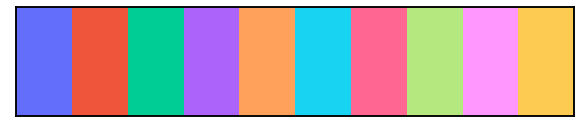

In [1]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

# import the libray to show the dataframes in output as a table
from tabulate import tabulate
from IPython.display import display

sns.set_context("talk")


import os

global DATA_ORIGINAL_PATH, DATA_GENERATED_PATH, IMAGES_GENERATED_PATH, IMAGES_PRESENTATION_PATH

DATA_ORIGINAL_PATH = "00_data_original/"
DATA_GENERATED_PATH = "01_data_generated/"
IMAGES_GENERATED_PATH = "02_images_generated/"
IMAGES_PRESENTATION_PATH = "03_images_for_presentation/"

global DATA_ORIGINAL_FILES, DATA_GENERATED_FILES, IMAGES_GENERATED_FILES, IMAGES_PRESENTATION_FILES

DATA_ORIGINAL_FILES = [os.path.join(DATA_ORIGINAL_PATH, f) for f in os.listdir(DATA_ORIGINAL_PATH) if os.path.isfile(os.path.join(DATA_ORIGINAL_PATH, f))]
DATA_GENERATED_FILES = [os.path.join(DATA_GENERATED_PATH, f) for f in os.listdir(DATA_GENERATED_PATH) if os.path.isfile(os.path.join(DATA_GENERATED_PATH, f))]
IMAGES_GENERATED_FILES = [os.path.join(IMAGES_GENERATED_PATH, f) for f in os.listdir(IMAGES_GENERATED_PATH) if os.path.isfile(os.path.join(IMAGES_GENERATED_PATH, f))]
IMAGES_PRESENTATION_FILES = [os.path.join(IMAGES_PRESENTATION_PATH, f) for f in os.listdir(IMAGES_PRESENTATION_PATH) if os.path.isfile(os.path.join(IMAGES_PRESENTATION_PATH, f))]


global COLORS
import plotly.express as px

# Get the original Wd3 discrete color map

COLORS = px.colors.qualitative.Plotly
# COLORS

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 2))

for i, color in enumerate(COLORS):
    _ = plt.fill_between([i, i + 1], 0, 1, facecolor=color)

_ = plt.xlim(0, len(COLORS))
_ = plt.ylim(0, 1)

_ = plt.xticks([])
_ = plt.yticks([])
fig.savefig(IMAGES_GENERATED_PATH + 'Plotly_Plotly_COLORS.png', dpi=300, bbox_inches='tight')
_ = plt.show()


In [2]:
# read all the dataframes from DATA_GENERATED_PATH with name beginning with 'FE_', to dataframe witht the same name
import glob

for file in glob.glob(DATA_GENERATED_PATH + 'FE2_*.parquet'):
    name = file.split('/')[-1].split('.')[0]
    globals()[name] = pd.read_parquet(file)
    print(name, 'read')


FE2_airport_info read
FE2_average_speeds_df read
FE2_avg_fuel_per_passenger_km_by_crs read
FE2_between_airports_total_flights read
FE2_between_total_passengers read
FE2_carrier_flights_passengers_monthly_stats read
FE2_crs_data_count_cluster read
FE2_crs_origin_dest_passengers_per_flight_per_seat read
FE2_flights_df_FE_filtered_1stWeek_columnDropped read
FE2_flights_fully_engineered_test read
FE2_flights_fully_engineered_training read
FE2_flights_test_2020week1_columnDropped_no_speed read
FE2_num_flights_per_state read
FE2_total_flights_per_airport read


In [3]:
FE2_flights_df_FE_filtered_1stWeek_columnDropped.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin_airport_id', 'origin', 'dest_airport_id', 'dest', 'dep_delay',
       'arr_delay', 'cancelled', 'cancellation_code', 'crs_elapsed_time',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'datetime', 'year', 'month',
       'week_of_year', 'day', 'day_of_week', 'hour', 'carrier_delay_min',
       'carrier_delay_max', 'carrier_delay_mean', 'carrier_delay_median',
       'carrier_delay_count', 'carrier_delay_sum', 'weather_delay_min',
       'weather_delay_max', 'weather_delay_mean', 'weather_delay_median',
       'weather_delay_count', 'weather_delay_sum', 'nas_delay_min',
       'nas_delay_max', 'nas_delay_mean', 'nas_delay_median',
       'nas_delay_count', 'nas_delay_sum', 'security_delay_min',
       'security_delay_max', 'security_delay_mean', 'security_delay_median',
       'security_delay_count', 'security_delay_sum', 'late_aircraft_delay_min

In [4]:
FE2_average_speeds_df.columns

Index(['avg_spd_mkt_unique_carrier', 'avg_spd_mkt_carrier_fl_num',
       'avg_spd_average_speed'],
      dtype='object')

In [5]:
FE2_average_speeds_df.head()

,avg_spd_mkt_unique_carrier,avg_spd_mkt_carrier_fl_num,avg_spd_average_speed
0,AA,1,442.526369
1,AA,2,506.087834
2,AA,3,448.416784
3,AA,4,504.678290
4,AA,5,486.886493


In [6]:
FE2_flights_df_FE_filtered_1stWeek_columnDropped.shape

(275958, 63)

In [7]:
# merge: FE2_flights_df_FE_filtered_1stWeek_columnDropped, FE2_average_speeds_df, left on = ['mkt_unique_carrier', 'mkt_carrier_fl_num',] right on = ['avg_spd_mkt_unique_carrier', 'avg_spd_mkt_carrier_fl_num'], how = 'left'
import pandas as pd

# Rename the columns in the right dataframe
FE2_average_speeds_df = FE2_average_speeds_df.rename(columns={
    'avg_spd_mkt_unique_carrier': 'mkt_unique_carrier',
    'avg_spd_mkt_carrier_fl_num': 'mkt_carrier_fl_num'
})

# Merge the dataframes using the same column names
df_merged_ = FE2_flights_df_FE_filtered_1stWeek_columnDropped.merge(
    FE2_average_speeds_df,
    on=['mkt_unique_carrier', 'mkt_carrier_fl_num'],
    how='left'
)


In [8]:
df_merged_.shape

(275958, 64)

In [9]:
FE2_crs_origin_dest_passengers_per_flight_per_seat

,crs_psgr_per_seat_min,crs_psgr_per_seat_max,crs_psgr_per_seat_mean,crs_psgr_per_seat_median,crs_psgr_per_seat_std,crs_psgr_per_seat_mkt_unique_carrier,crs_psgr_per_seat_origin_airport_id,crs_psgr_per_seat_dest_airport_id
0,0.028485,1.000000,0.223042,0.041397,0.342885,DL,14869,12264
1,0.000000,0.955414,0.219892,0.065852,0.275968,DL,11433,10792
2,0.000000,0.993671,0.217650,0.036333,0.302261,DL,10397,11057
3,0.000000,1.000000,0.251841,0.045740,0.327698,DL,11057,10397
4,0.008777,1.000000,0.163090,0.029271,0.277982,DL,14869,12889
...,...,...,...,...,...,...,...,...
10492,0.519553,0.826816,0.693769,0.734940,0.157714,UA,12889,14492
10493,NaN,NaN,NaN,NaN,NaN,DL,11122,14457
10494,0.245312,0.756250,0.575521,0.725000,0.286395,DL,10721,14730
10495,0.893750,0.962500,0.933333,0.943750,0.035539,DL,14730,10721


In [10]:
# merge: df_merged_, FE2_crs_origin_dest_passengers_per_flight_per_seat, left on = ['mkt_unique_carrier', 'origin_airport_id', 'dest_airport_id', ] right on = ['crs_psgr_per_seat_mkt_unique_carrier',	'crs_psgr_per_seat_origin_airport_id',	'crs_psgr_per_seat_dest_airport_id'], how = 'left'
import pandas as pd

# Rename the columns in the right dataframe
FE2_crs_origin_dest_passengers_per_flight_per_seat = FE2_crs_origin_dest_passengers_per_flight_per_seat.rename(columns={
    'crs_psgr_per_seat_mkt_unique_carrier': 'mkt_unique_carrier',
    'crs_psgr_per_seat_origin_airport_id': 'origin_airport_id',
    'crs_psgr_per_seat_dest_airport_id': 'dest_airport_id'
})

# Merge the dataframes using the same column names
df_merged_ = df_merged_.merge(
    FE2_crs_origin_dest_passengers_per_flight_per_seat,
    on=['mkt_unique_carrier', 'origin_airport_id', 'dest_airport_id'],
    how='left'
)
df_merged_.shape

(275958, 69)

In [11]:
FE2_avg_fuel_per_passenger_km_by_crs

,crs_avg_fuel_psgr_km_mkt_unique_carrier,crs_avg_fuel_psgr_km_avg_monthly_delay,crs_avg_fuel_psgr_km_monthly_distance,crs_avg_fuel_psgr_km_monthly_passengers,crs_avg_fuel_psgr_km_avg_monthly_fuel,crs_avg_fuel_psgr_km_avg_fuel_per_passenger_km
2,B6,11.266252,5.467669e+07,1.657267e+07,3.139216e+08,3.464388e-07
4,F9,11.109340,2.198570e+07,7.313943e+06,9.377454e+07,5.831673e-07
8,UA,9.046646,2.027373e+08,4.449056e+07,1.329742e+09,1.474232e-07
5,G4,8.497450,1.469276e+07,5.177141e+06,7.081350e+07,9.309423e-07
0,AA,6.362003,2.396124e+08,5.960032e+07,1.386241e+09,9.706901e-08
7,NK,4.938210,3.199132e+07,1.062746e+07,1.386090e+08,4.076895e-07
10,WN,3.518818,1.685647e+08,6.695833e+07,7.999200e+08,7.087209e-08
3,DL,2.459706,2.029603e+08,6.187595e+07,1.379188e+09,1.098222e-07
9,VX,1.474412,8.621435e+06,2.134765e+06,4.748528e+07,2.580057e-06
6,HA,1.302327,1.007836e+07,4.648382e+06,1.011299e+08,2.158679e-06


In [12]:
# merge: df_merged_, FE2_avg_fuel_per_passenger_km_by_crs, left on = ['mkt_unique_carrier'] right on = ['crs_avg_fuel_psgr_km_mkt_unique_carrier'], how = 'left'
import pandas as pd

# Rename the columns in the right dataframe
FE2_avg_fuel_per_passenger_km_by_crs = FE2_avg_fuel_per_passenger_km_by_crs.rename(columns={
    'crs_avg_fuel_psgr_km_mkt_unique_carrier': 'mkt_unique_carrier'
})

# Merge the dataframes using the same column names
df_merged_ = df_merged_.merge(
    FE2_avg_fuel_per_passenger_km_by_crs,
    on=['mkt_unique_carrier'],
    how='left'
)
df_merged_.shape    

(275958, 74)

In [13]:
FE2_between_airports_total_flights

,btn_ttl_flt_airport_origin,btn_ttl_flt_airport_dest,btn_ttl_flt_between_airport_total_flights
0,ABE,ABE,24050
1,ABI,ABI,8582
2,ABQ,ABQ,108733
3,ABR,ABR,2986
4,ABY,ABY,4040
...,...,...,...
371,XWA,XWA,838
372,YAK,YAK,2885
373,YKM,YKM,5028
374,YNG,YNG,4


issue: no data merged, 

In [14]:
# # merge: df_merged_, FE2_between_airports_total_flights, left on = ['origin','dest'] right on = ['btn_ttl_flt_airport_origin' 'btn_ttl_flt_airport_dest'], how = 'left'
# import pandas as pd

# # Rename the columns in the right dataframe
# FE2_between_airports_total_flights = FE2_between_airports_total_flights.rename(columns={
#     'btn_ttl_flt_airport_origin': 'origin',
#     'btn_ttl_flt_airport_dest': 'dest'
# })

# # Merge the dataframes using the same column names
# df_merged_ = df_merged_.merge(
#     FE2_between_airports_total_flights,
#     on=['origin', 'dest'],
#     how='left'
# )

# df_merged_.shape

In [15]:
FE2_between_total_passengers

,btn_ttl_psgr_airport_origin,btn_ttl_psgr_airport_dest,btn_ttl_psgr_between_airport_total_passengers
0,05A,05A,1591.0
1,06A,06A,37.0
2,08A,08A,32.0
3,09A,09A,108.0
4,1B1,1B1,45.0
...,...,...,...
2369,ZXK,ZXK,1.0
2370,ZXM,ZXM,9001.0
2371,ZXN,ZXN,3242.0
2372,ZXU,ZXU,362.0


issue, no data merged

In [16]:
# # merge: df_merged_, FE2_between_total_passengers, left on = ['origin','dest'] right on = ['btn_ttl_psgr_airport_origin' 'btn_ttl_psgr_airport_dest'], how = 'left'
# import pandas as pd

# # Rename the columns in the right dataframe
# FE2_between_total_passengers = FE2_between_total_passengers.rename(columns={
#     'btn_ttl_psgr_airport_origin': 'origin',
#     'btn_ttl_psgr_airport_dest': 'dest'
# })

# # Merge the dataframes using the same column names
# df_merged_ = df_merged_.merge(
#     FE2_between_total_passengers,
#     on=['origin', 'dest'],
#     how='left'
# )

# df_merged_.shape


In [17]:
FE2_carrier_flights_passengers_monthly_stats

,crs_mnthly_stats_monthly_flights_min,crs_mnthly_stats_monthly_flights_max,crs_mnthly_stats_monthly_flights_mean,crs_mnthly_stats_monthly_flights_median,crs_mnthly_stats_monthly_flights_std,crs_mnthly_stats_mkt_unique_carrier,crs_mnthly_stats_monthly_pax_min,crs_mnthly_stats_monthly_pax_max,crs_mnthly_stats_monthly_pax_mean,crs_mnthly_stats_monthly_pax_median,crs_mnthly_stats_monthly_pax_std
0,0.253316,0.253316,0.253316,0.253316,5.797951e-17,DL,0.253316,0.253316,0.253316,0.253316,5.797951e-17
1,0.184931,0.184931,0.184931,0.184931,0.000000e+00,AS,0.184931,0.184931,0.184931,0.184931,0.000000e+00
2,0.243666,0.243666,0.243666,0.243666,8.696926e-17,G4,0.243666,0.243666,0.243666,0.243666,8.696926e-17
3,0.238519,0.238519,0.238519,0.238519,8.696926e-17,UA,0.238519,0.238519,0.238519,0.238519,8.696926e-17
4,0.205064,0.205064,0.205064,0.205064,0.000000e+00,AA,0.205064,0.205064,0.205064,0.205064,0.000000e+00
5,0.172563,0.172563,0.172563,0.172563,2.898975e-17,NK,0.172563,0.172563,0.172563,0.172563,2.898975e-17
6,0.178813,0.178813,0.178813,0.178813,5.797951e-17,F9,0.178813,0.178813,0.178813,0.178813,5.797951e-17
7,0.162673,0.162673,0.162673,0.162673,2.898975e-17,WN,0.162673,0.162673,0.162673,0.162673,2.898975e-17
8,0.157097,0.157097,0.157097,0.157097,2.898975e-17,B6,0.157097,0.157097,0.157097,0.157097,2.898975e-17
9,0.111777,0.111777,0.111777,0.111777,1.449488e-17,HA,0.111777,0.111777,0.111777,0.111777,1.449488e-17


In [18]:
df_merged_.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin_airport_id', 'origin', 'dest_airport_id', 'dest', 'dep_delay',
       'arr_delay', 'cancelled', 'cancellation_code', 'crs_elapsed_time',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'datetime', 'year', 'month',
       'week_of_year', 'day', 'day_of_week', 'hour', 'carrier_delay_min',
       'carrier_delay_max', 'carrier_delay_mean', 'carrier_delay_median',
       'carrier_delay_count', 'carrier_delay_sum', 'weather_delay_min',
       'weather_delay_max', 'weather_delay_mean', 'weather_delay_median',
       'weather_delay_count', 'weather_delay_sum', 'nas_delay_min',
       'nas_delay_max', 'nas_delay_mean', 'nas_delay_median',
       'nas_delay_count', 'nas_delay_sum', 'security_delay_min',
       'security_delay_max', 'security_delay_mean', 'security_delay_median',
       'security_delay_count', 'security_delay_sum', 'late_aircraft_delay_min

In [19]:
# merge: df_merged_, FE2_carrier_flights_passengers_monthly_stats, left on = ['mkt_unique_carrier'] right on = ['crs_mnthly_stats_mkt_unique_carrier'], how = 'left'
import pandas as pd

# Rename the columns in the right dataframe
FE2_carrier_flights_passengers_monthly_stats = FE2_carrier_flights_passengers_monthly_stats.rename(columns={
    'crs_mnthly_stats_mkt_unique_carrier': 'mkt_unique_carrier'
})

# Merge the dataframes using the same column names
df_merged_ = df_merged_.merge(
    FE2_carrier_flights_passengers_monthly_stats,
    on=['mkt_unique_carrier'],
    how='left'
)
df_merged_.shape

(275958, 84)

In [20]:
FE2_crs_data_count_cluster.drop(['crs_flts_cnt_size_Name'], axis=1, inplace=True)
FE2_crs_data_count_cluster

,crs_flts_cnt_size_Code,crs_flts_cnt_size_Flights_Count,crs_flts_cnt_size_size
4,AA,4138991,1
0,DL,3487118,1
3,UA,3092995,1
7,WN,2713963,1
1,AS,853796,0
8,B6,600928,0
5,NK,380654,0
6,F9,255388,0
2,G4,201464,0
9,HA,184622,0


In [21]:
# merge: df_merged_, FE2_crs_data_count_cluster, left on = ['mkt_unique_carrier'] right on = ['crs_flts_cnt_size_Code'], how = 'left'
import pandas as pd

# Rename the columns in the right dataframe
FE2_crs_data_count_cluster = FE2_crs_data_count_cluster.rename(columns={
    'crs_flts_cnt_size_Code': 'mkt_unique_carrier'
})

# Merge the dataframes using the same column names
df_merged_ = df_merged_.merge(
    FE2_crs_data_count_cluster,
    on=['mkt_unique_carrier'],
    how='left'
)
df_merged_.shape


(275958, 86)

In [22]:
df_merged_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275958 entries, 0 to 275957
Data columns (total 86 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   fl_date                                         275958 non-null  object        
 1   mkt_unique_carrier                              275958 non-null  object        
 2   mkt_carrier_fl_num                              275958 non-null  int64         
 3   origin_airport_id                               275958 non-null  int64         
 4   origin                                          275958 non-null  object        
 5   dest_airport_id                                 275958 non-null  int64         
 6   dest                                            275958 non-null  object        
 7   dep_delay                                       274452 non-null  float64       
 8   arr_delay                         

In [23]:
# save df_merged_ to parquet
df_merged_.to_parquet(DATA_GENERATED_PATH + 'FE2_flights_fully_engineered_training.parquet')



In [24]:
columns_display = ['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'origin_airport_id', 'origin', 'dest_airport_id', 'dest']

In [25]:
columns_y = ['dep_delay',
       'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'cancelled_mode', 'cancellation_code_mode']

In [26]:
columns_useless = ['datetime', 'year']

In [27]:
columns_X = [ 'crs_elapsed_time', 'distance', 
       'month', 'week_of_year', 'day', 'day_of_week',
       'hour', 'carrier_delay_min', 'carrier_delay_max', 'carrier_delay_mean',
       'carrier_delay_median', 'carrier_delay_count', 'carrier_delay_sum',
       'weather_delay_min', 'weather_delay_max', 'weather_delay_mean',
       'weather_delay_median', 'weather_delay_count', 'weather_delay_sum',
       'nas_delay_min', 'nas_delay_max', 'nas_delay_mean', 'nas_delay_median',
       'nas_delay_count', 'nas_delay_sum', 'security_delay_min',
       'security_delay_max', 'security_delay_mean', 'security_delay_median',
       'security_delay_count', 'security_delay_sum', 'late_aircraft_delay_min',
       'late_aircraft_delay_max', 'late_aircraft_delay_mean',
       'late_aircraft_delay_median', 'late_aircraft_delay_count',
       'late_aircraft_delay_sum', 
       'speed', 'speed_min', 'speed_max', 'speed_mean', 'speed_median',
       'speed_count', 'speed_sum', 'avg_spd_average_speed',
       'crs_psgr_per_seat_min', 'crs_psgr_per_seat_max',
       'crs_psgr_per_seat_mean', 'crs_psgr_per_seat_median',
       'crs_psgr_per_seat_std', 'crs_avg_fuel_psgr_km_avg_monthly_delay',
       'crs_avg_fuel_psgr_km_monthly_distance',
       'crs_avg_fuel_psgr_km_monthly_passengers',
       'crs_avg_fuel_psgr_km_avg_monthly_fuel',
       'crs_avg_fuel_psgr_km_avg_fuel_per_passenger_km',
       'crs_mnthly_stats_monthly_flights_min',
       'crs_mnthly_stats_monthly_flights_max',
       'crs_mnthly_stats_monthly_flights_mean',
       'crs_mnthly_stats_monthly_flights_median',
       'crs_mnthly_stats_monthly_flights_std',
       'crs_mnthly_stats_monthly_pax_min', 'crs_mnthly_stats_monthly_pax_max',
       'crs_mnthly_stats_monthly_pax_mean',
       'crs_mnthly_stats_monthly_pax_median',
       'crs_mnthly_stats_monthly_pax_std', 'crs_flts_cnt_size_Flights_Count',
       'crs_flts_cnt_size_size'],

In [28]:
columns_X_y = [ 'dep_delay',
       'arr_delay', 'crs_elapsed_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'month', 'week_of_year', 'day', 'day_of_week',
       'hour', 'carrier_delay_min', 'carrier_delay_max', 'carrier_delay_mean',
       'carrier_delay_median', 'carrier_delay_count', 'carrier_delay_sum',
       'weather_delay_min', 'weather_delay_max', 'weather_delay_mean',
       'weather_delay_median', 'weather_delay_count', 'weather_delay_sum',
       'nas_delay_min', 'nas_delay_max', 'nas_delay_mean', 'nas_delay_median',
       'nas_delay_count', 'nas_delay_sum', 'security_delay_min',
       'security_delay_max', 'security_delay_mean', 'security_delay_median',
       'security_delay_count', 'security_delay_sum', 'late_aircraft_delay_min',
       'late_aircraft_delay_max', 'late_aircraft_delay_mean',
       'late_aircraft_delay_median', 'late_aircraft_delay_count',
       'late_aircraft_delay_sum', 'cancelled_mode', 'cancellation_code_mode',
       'speed', 'speed_min', 'speed_max', 'speed_mean', 'speed_median',
       'speed_count', 'speed_sum', 'avg_spd_average_speed',
       'crs_psgr_per_seat_min', 'crs_psgr_per_seat_max',
       'crs_psgr_per_seat_mean', 'crs_psgr_per_seat_median',
       'crs_psgr_per_seat_std', 'crs_avg_fuel_psgr_km_avg_monthly_delay',
       'crs_avg_fuel_psgr_km_monthly_distance',
       'crs_avg_fuel_psgr_km_monthly_passengers',
       'crs_avg_fuel_psgr_km_avg_monthly_fuel',
       'crs_avg_fuel_psgr_km_avg_fuel_per_passenger_km',
       'crs_mnthly_stats_monthly_flights_min',
       'crs_mnthly_stats_monthly_flights_max',
       'crs_mnthly_stats_monthly_flights_mean',
       'crs_mnthly_stats_monthly_flights_median',
       'crs_mnthly_stats_monthly_flights_std',
       'crs_mnthly_stats_monthly_pax_min', 'crs_mnthly_stats_monthly_pax_max',
       'crs_mnthly_stats_monthly_pax_mean',
       'crs_mnthly_stats_monthly_pax_median',
       'crs_mnthly_stats_monthly_pax_std', 'crs_flts_cnt_size_Flights_Count',
       'crs_flts_cnt_size_size'],